<a href="https://colab.research.google.com/github/N3haS/rl-game-for-ocd-dyslexia/blob/main/eye_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow import keras
import matplotlib.pyplot as plt

def preprocess_data(folder):
    data = []
    label = []
    for filename in os.listdir(folder):
        sub_dir = os.path.join(folder, filename)
        for img_name in os.listdir(sub_dir):
            img_dir = os.path.join(sub_dir, img_name)
            img = cv2.imread(img_dir)
            # Resize image
            img = cv2.resize(img, (128, 128))
            # Convert to grayscale if necessary
            # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            data.append(img / 255.0)  # Normalize pixel values
            label.append(int(filename))
    return np.array(data), np.array(label)

In [ ]:
def train_CNN(X_train, y_train):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(5)  # Adjust output size based on the number of classes
    ])
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)
    return model, history

In [ ]:
def show_history_graph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()


In [ ]:
data, label = preprocess_data('eye dataset')

FileNotFoundError: [Errno 2] No such file or directory: 'eye dataset'

In [ ]:
smote = SMOTE(random_state=42)
data_resampled, label_resampled = smote.fit_resample(data.reshape(-1, 128*128*3), label)

In [ ]:
data_resampled = data_resampled.reshape(-1, 128, 128, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_resampled, label_resampled, test_size=0.2, random_state=42)

In [ ]:
model_CNN, history = train_CNN(X_train, y_train)


Epoch 1/20
4/4 [==============================] - 8s 957ms/step - loss: 1.8411 - accuracy: 0.2190 - val_loss: 1.1340 - val_accuracy: 0.7407
Epoch 2/20
4/4 [==============================] - 3s 844ms/step - loss: 1.0542 - accuracy: 0.5524 - val_loss: 0.8426 - val_accuracy: 0.4815
Epoch 3/20
4/4 [==============================] - 3s 738ms/step - loss: 0.7234 - accuracy: 0.6762 - val_loss: 0.5352 - val_accuracy: 0.8889
Epoch 4/20
4/4 [==============================] - 4s 1s/step - loss: 0.3074 - accuracy: 0.9619 - val_loss: 0.1473 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 3s 738ms/step - loss: 0.0682 - accuracy: 0.9810 - val_loss: 0.0915 - val_accuracy: 0.9630
Epoch 6/20
4/4 [==============================] - 3s 690ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0515 - val_accuracy: 0.9630
Epoch 7/20
4/4 [==============================] - 3s 696ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 8/20
4/4 [=======

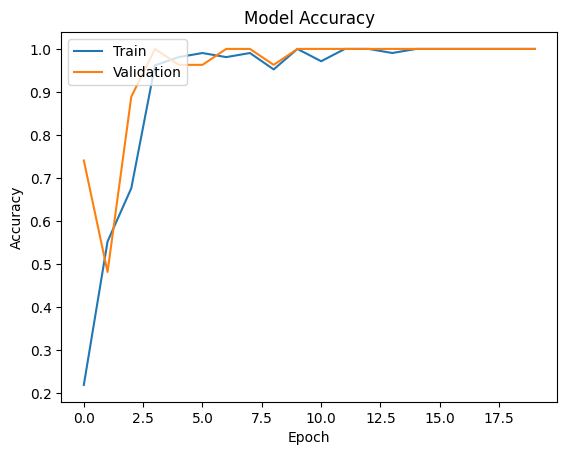

In [ ]:
show_history_graph(history)

In [ ]:
test_loss, test_acc = model_CNN.evaluate(X_test, y_test)
print("Testing Accuracy:", test_acc)
print("Testing Loss:", test_loss)

2/2 [==============================] - 1s 27ms/step - loss: 4.8608e-04 - accuracy: 1.0000
Testing Accuracy: 1.0
Testing Loss: 0.00048607823555357754


In [ ]:
model_CNN.save('eye_movement_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 745.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=73a2d2a04b8fa5ec80003755629e2abac9048c07dd6923215c797b6493932e51
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 36.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import cv2
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import np_utils
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.python.keras import  layers, models
import datasets



In [ ]:

def show_history_graph(history):
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()



In [ ]:
data2=[]
data=[]
featurematrix=[]
label=[]
label2=[]
folder = "eye dataset"
for filename in os.listdir(folder):

    sub_dir=(folder+'/' +filename)
    for img_name in os.listdir(sub_dir):
        img_dir=str(sub_dir+ '/' +img_name)
        print(int(filename),img_dir)
        img = cv2.imread(img_dir)
        # Resize image
        img = cv2.resize(img,(128,128))
        if len(img.shape)==3:
            img2 = cv2.resize(img,(32,32))
            img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
            img2=img2.flatten()
            data2.append(img2/255.0)
            label2.append(int(filename))

        data11=np.array(img)
        data.append(data11/255.0)
        label.append(int(filename))



1 eye dataset/1/38.jpg
1 eye dataset/1/35.jpg
1 eye dataset/1/101.jpg
1 eye dataset/1/39.jpg
1 eye dataset/1/102.jpg
1 eye dataset/1/107.jpg
1 eye dataset/1/33.jpg
1 eye dataset/1/29.jpg
1 eye dataset/1/108.jpg
1 eye dataset/1/106.jpg
1 eye dataset/1/103.jpg
1 eye dataset/1/31.jpg
1 eye dataset/1/110.jpg
1 eye dataset/1/105.jpg
1 eye dataset/1/32.jpg
1 eye dataset/1/37.jpg
1 eye dataset/1/36.jpg
1 eye dataset/1/34.jpg
1 eye dataset/1/104.jpg
1 eye dataset/1/109.jpg
1 eye dataset/1/30.jpg
1 eye dataset/1/40.jpg
0 eye dataset/0/120.jpg
0 eye dataset/0/10.jpg
0 eye dataset/0/171.jpg
0 eye dataset/0/27.jpg
0 eye dataset/0/9.jpg
0 eye dataset/0/19.jpg
0 eye dataset/0/173.jpg
0 eye dataset/0/6.jpg
0 eye dataset/0/165.jpg
0 eye dataset/0/21.jpg
0 eye dataset/0/17.jpg
0 eye dataset/0/184.jpg
0 eye dataset/0/179.jpg
0 eye dataset/0/169.jpg
0 eye dataset/0/182.jpg
0 eye dataset/0/166.jpg
0 eye dataset/0/15.jpg
0 eye dataset/0/121.jpg
0 eye dataset/0/14.jpg
0 eye dataset/0/125.jpg
0 eye dataset/0

In [ ]:
def train_CNN(data, label):
    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.20)

    # Define the CNN model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(36))

    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test))

    # Show training history
    show_history_graph(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
    print("Testing Accuracy is ", test_acc)
    print("Testing loss is ", test_loss)

    # Save the model
    model.save('eye_movement_trained.h5')

    return model

# CNN Training
model_CNN = train_CNN(data,label)
Y_CNN=model_CNN.predict(np.array(data))


NameError: name 'data' is not defined

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_CNN_with_augmentation(data, label):
    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(data, label, test_size=0.20)

    # Data augmentation for both images and labels
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # Fit data augmentation generator on training data
    train_datagen.fit(X_train)

    # Define the CNN model
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(36))

    # Compile the model
    model.compile(optimizer='adam',
                  loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model with augmented data
    history = model.fit(train_datagen.flow(X_train, Y_train, batch_size=32),
                        steps_per_epoch=len(X_train) / 32,
                        epochs=20,
                        validation_data=(X_test, Y_test))

    # Show training history
    show_history_graph(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
    print("Testing Accuracy is ", test_acc)
    print("Testing loss is ", test_loss)

    # Save the model
    model.save('eye_movement_trained_with_augmentation.h5')

    return model

# CNN Training with Data Augmentation
model_CNN_with_augmentation = train_CNN_with_augmentation(data, label)
Y_CNN_with_augmentation = model_CNN_with_augmentation.predict(np.array(data))


ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (128, 128, 3), y.shape = (94,)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

def preprocess_data(data, label):
    # Preprocess the data (resize, normalize, etc.)
    processed_data = np.array([img_to_array(array_to_img(img, scale=False).resize((224, 224))) / 255. for img in data])
    processed_label = np.array(label)
    return processed_data, label

def train_CNN_with_transfer_learning(data, label):
    # Preprocess the data
    processed_data, label = preprocess_data(data, label)

    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(processed_data, label, test_size=0.20)

    # Load the pre-trained VGG16 model (without the top classification layer)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the convolutional base
    base_model.trainable = False

    # Add a custom classification head
    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(36, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

    # Show training history
    show_history_graph(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
    print("Testing Accuracy is ", test_acc)
    print("Testing loss is ", test_loss)

    # Save the model
    model.save('eye_movement_trained_with_transfer_learning.h5')

    return model

# CNN Training with Transfer Learning
model_CNN_with_transfer_learning = train_CNN_with_transfer_learning(data, label)
Y_CNN_with_transfer_learning = model_CNN_with_transfer_learning.predict(np.array(data))


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

def preprocess_data(data, label):
    # Preprocess the data (resize, normalize, etc.)
    processed_data = np.array([img_to_array(array_to_img(img, scale=False).resize((224, 224))) / 255. for img in data])
    processed_label = np.array(label)  # Convert labels to numpy array
    return processed_data, processed_label

def train_CNN_with_transfer_learning(data, label):
    # Preprocess the data
    processed_data, processed_label = preprocess_data(data, label)

    # Split data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(processed_data, processed_label, test_size=0.20)

    # Load the pre-trained VGG16 model (without the top classification layer)
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the convolutional base
    base_model.trainable = False

    # Add a custom classification head
    model = keras.models.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(36, activation='softmax')  # Assuming 36 classes
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

    # Show training history
    show_history_graph(history)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
    print("Testing Accuracy is ", test_acc)
    print("Testing loss is ", test_loss)

    # Save the model
    model.save('eye_movement_trained_with_transfer_learning.h5')

    return model

# Convert labels to numpy array
label = np.array(label)

# CNN Training with Transfer Learning
model_CNN_with_transfer_learning = train_CNN_with_transfer_learning(data, label)
Y_CNN_with_transfer_learning = model_CNN_with_transfer_learning.predict(np.array(data))


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-15-2e8c520fa066>", line 61, in <cell line: 61>

  File "<ipython-input-15-2e8c520fa066>", line 42, in train_CNN_with_transfer_learning

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,36] and labels shape [1152]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_4824]

In [ ]:


from imutils.video import VideoStream
import os
import numpy as np
import imutils
import cv2
import tensorflow as tf

list1= ['looking at center','looking at left','looking at right','looking at up','looking at down']
eye_cnn = tf.keras.models.load_model('eye_movement_trained.h5')
# histogram based equalization
def histogram_equalization(img):
    r,g,b = cv2.split(img)
    f_img1 = cv2.equalizeHist(r)
    f_img2 = cv2.equalizeHist(g)
    f_img3 = cv2.equalizeHist(b)
    img = cv2.merge((f_img1,f_img2,f_img3))
    return img



OSError: No file or directory found at eye_movement_trained.h5